## Collect daily yield data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from fredapi import Fred
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Initialize the FRED API with your key
YOUR_API_KEY = '134f245798509e9960f514386bba6b38'
fred = Fred(api_key=YOUR_API_KEY)  # Replace my APIKEY with "YOUR_API_KEY"

In [3]:
# e. Collect daily closing yields for 5 government securities (6 months)
series_ids = {
    '2YR': 'DGS2',  # 2-Year Treasury Constant Maturity
    '3YR': 'DGS3',  # 3-Year Treasury Constant Maturity
    '5YR': 'DGS5',  # 5-Year Treasury Constant Maturity
    '10YR': 'DGS10', # 10-Year Treasury Constant Maturity
    '30YR': 'DGS30'  # 30-Year Treasury Constant Maturity
}

In [4]:
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(months=6)

In [5]:
# Fetch data and store in a dictionary
yields_data = {}
for maturity, series_id in series_ids.items():
    data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    yields_data[maturity] = data

In [6]:
yields_df = pd.DataFrame(yields_data)
yields_df = yields_df.dropna() # Drop rows with NaN values.
yields_df = yields_df / 100 #convert to decimal
print(yields_df.head())

               2YR     3YR     5YR    10YR    30YR
2024-09-17  0.0359  0.0345  0.0344  0.0365  0.0396
2024-09-18  0.0361  0.0349  0.0347  0.0370  0.0403
2024-09-19  0.0359  0.0347  0.0349  0.0373  0.0406
2024-09-20  0.0355  0.0346  0.0348  0.0373  0.0407
2024-09-23  0.0357  0.0347  0.0351  0.0375  0.0409


## Compute daily yeild changes

In [22]:
# f. Compute daily yield changes
yield_changes_df = yields_df.diff().dropna() #calculate the changes, and drop the first row with nan values.
yield_changes_df.head()

,2YR,3YR,5YR,10YR,30YR
2024-09-18,0.02,0.04,0.03,0.05,0.07
2024-09-19,-0.02,-0.02,0.02,0.03,0.03
2024-09-20,-0.04,-0.01,-0.01,0.00,0.01
2024-09-23,0.02,0.01,0.03,0.02,0.02
2024-09-24,-0.08,-0.03,-0.04,-0.01,0.00


## Run PCA

In [8]:
# g. Re-run Principal Components using the covariance matrix
pca = PCA()
pca.fit(yield_changes_df)

PCA()

## Explained variance

In [9]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

In [10]:
print("\nExplained Variance:")
print(explained_variance)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance:
[1.30030198e-06 1.39927873e-07 1.72394028e-08 8.79339313e-09
 3.60709568e-09]

Explained Variance Ratio:
[0.88463756 0.09519746 0.01172852 0.00598243 0.00245402]


## Compare variances

In [11]:
# h. How do the variances of each component compare?
print("\nVariance Comparison:")
print(f"Component 1 explains {explained_variance_ratio[0] * 100:.2f}% of the variance.")
print(f"Component 2 explains {explained_variance_ratio[1] * 100:.2f}% of the variance.")
print(f"Component 3 explains {explained_variance_ratio[2] * 100:.2f}% of the variance.")


Variance Comparison:
Component 1 explains 88.46% of the variance.
Component 2 explains 9.52% of the variance.
Component 3 explains 1.17% of the variance.


## Variance Explanation:

In this real data scenario, the first few components explain a much larger portion of the variance compared to the uncorrelated data. This indicates that the yield changes are highly correlated. Component 1 captures the majority of the variance, suggesting a common factor driving yield changes across different maturities. The remaining components explain progressively less variance, indicating that they capture less significant variations in the data.

## Produce Scree plot

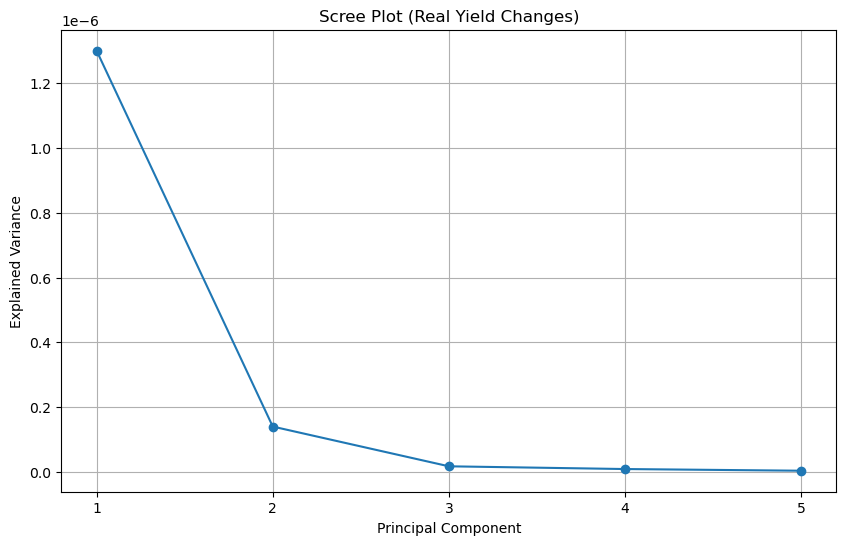

In [12]:
# i. Produce a screeplot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot (Real Yield Changes)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

## Compare scree plots

## How does the screeplot from the uncorrelated data compare with the screeplot from the government data?

### Scree Plot Comparison:

The screeplot from the uncorrelated data shows a more gradual decline in explained variance across the components. In contrast, the screeplot from the government data shows a steep decline in explained variance for the first few components, followed by a much flatter line. This indicates that the first few components in the government data capture a significantly larger portion of the variance compared to the uncorrelated data. This difference highlights the presence of strong correlations in real yield changes, which are absent in the simulated uncorrelated data.

In [13]:
# --- Simulated Uncorrelated Data ---
num_variables = 5
num_observations = 1000
mean = 0
std_dev = 0.01
uncorrelated_yield_changes = np.random.normal(mean, std_dev, (num_observations, num_variables))

In [14]:
# Uncorrelated PCA
pca_uncorrelated = PCA()
pca_uncorrelated.fit(uncorrelated_yield_changes)
explained_variance_uncorrelated = pca_uncorrelated.explained_variance_

In [15]:
# FRED series IDs for Treasury yields (adjust as needed)
series_ids = {
    '2YR': 'DGS2', '3YR': 'DGS3', '5YR': 'DGS5', '10YR': 'DGS10', '30YR': 'DGS30'
}

In [16]:
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(months=6)

In [17]:
# Fetch data and store in a dictionary
yields_data = {}
for maturity, series_id in series_ids.items():
    data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    yields_data[maturity] = data

In [18]:
yields_df = pd.DataFrame(yields_data).dropna()
yield_changes_df = (yields_df / 100).diff().dropna()

In [19]:
# Calculate real data PCA
pca_real = PCA()
pca_real.fit(yield_changes_df)
explained_variance_real = pca_real.explained_variance_

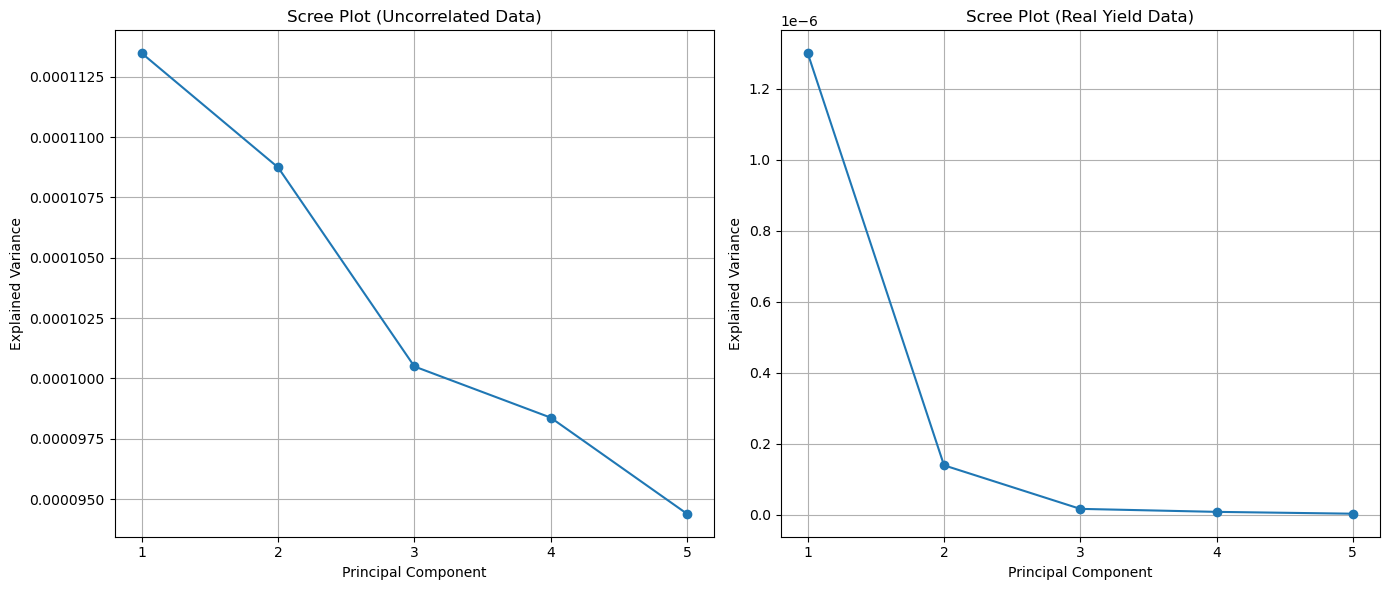

In [21]:
# --- Plotting Scree Plots Side-by-Side ---
plt.figure(figsize=(14, 6))

# Uncorrelated Data Scree Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_variables + 1), explained_variance_uncorrelated, marker='o')
plt.title('Scree Plot (Uncorrelated Data)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, num_variables + 1))
plt.grid(True)

# Real Yield Data Scree Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_real) + 1), explained_variance_real, marker='o')
plt.title('Scree Plot (Real Yield Data)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance_real) + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

## Comparison test

### Scree Plot Comparison:

The screeplot from the uncorrelated data shows a more gradual decline in explained variance across the components. In contrast, the screeplot from the government data shows a steep decline in explained variance for the first few components, followed by a much flatter line. This indicates that the first few components in the government data capture a significantly larger portion of the variance compared to the uncorrelated data. This difference highlights the presence of strong correlations in real yield changes, which are absent in the simulated uncorrelated data.